<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/trends/Muestra_Micro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Analisis micro de una muertra especifica`***

In [12]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [50]:
#@title CARGA DE DATA_SET 
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Particular9102022_1.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=";",decimal=",")
df=pd.DataFrame(datos)
dfx=df.copy()
dfx.Time= dfx.Date.values+' '+dfx.Time.values  

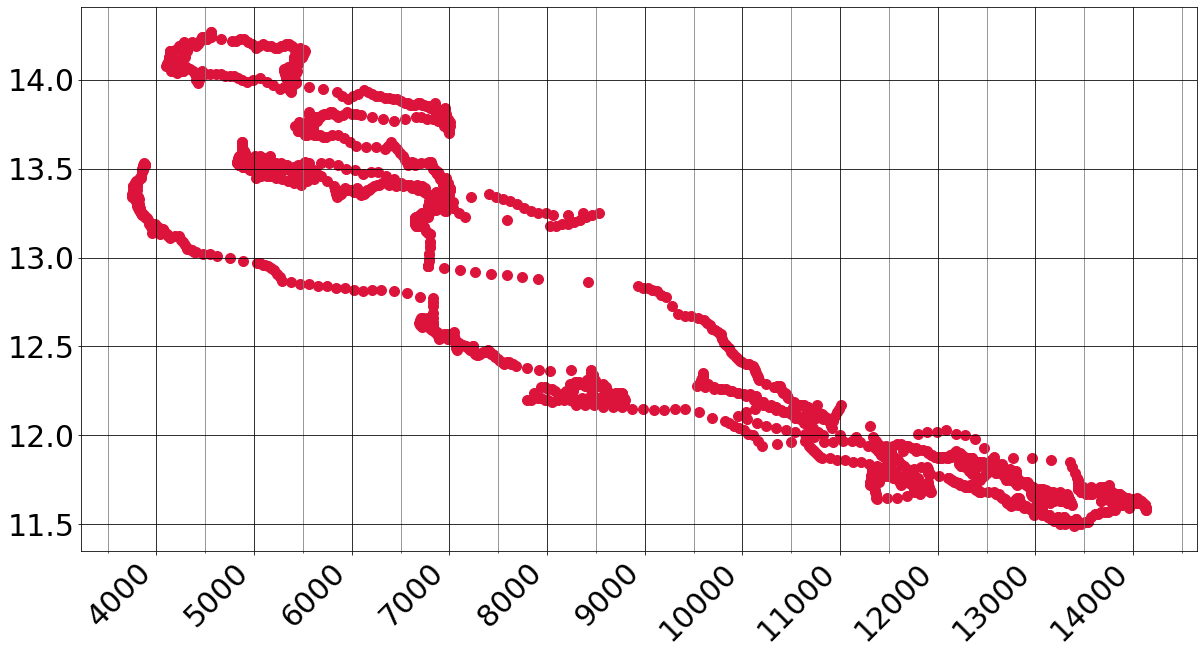

In [39]:
fig1, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(dfx['FQI161'],dfx['PIR161'],color='crimson',s=100)
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')
plt.setp(labels1,fontsize=30, horizontalalignment='right')

ax.xaxis.set_major_locator(MultipleLocator(1000),)
ax.xaxis.set_minor_locator(MultipleLocator(500),)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')
fig1.show()

ax.autoscale_view()


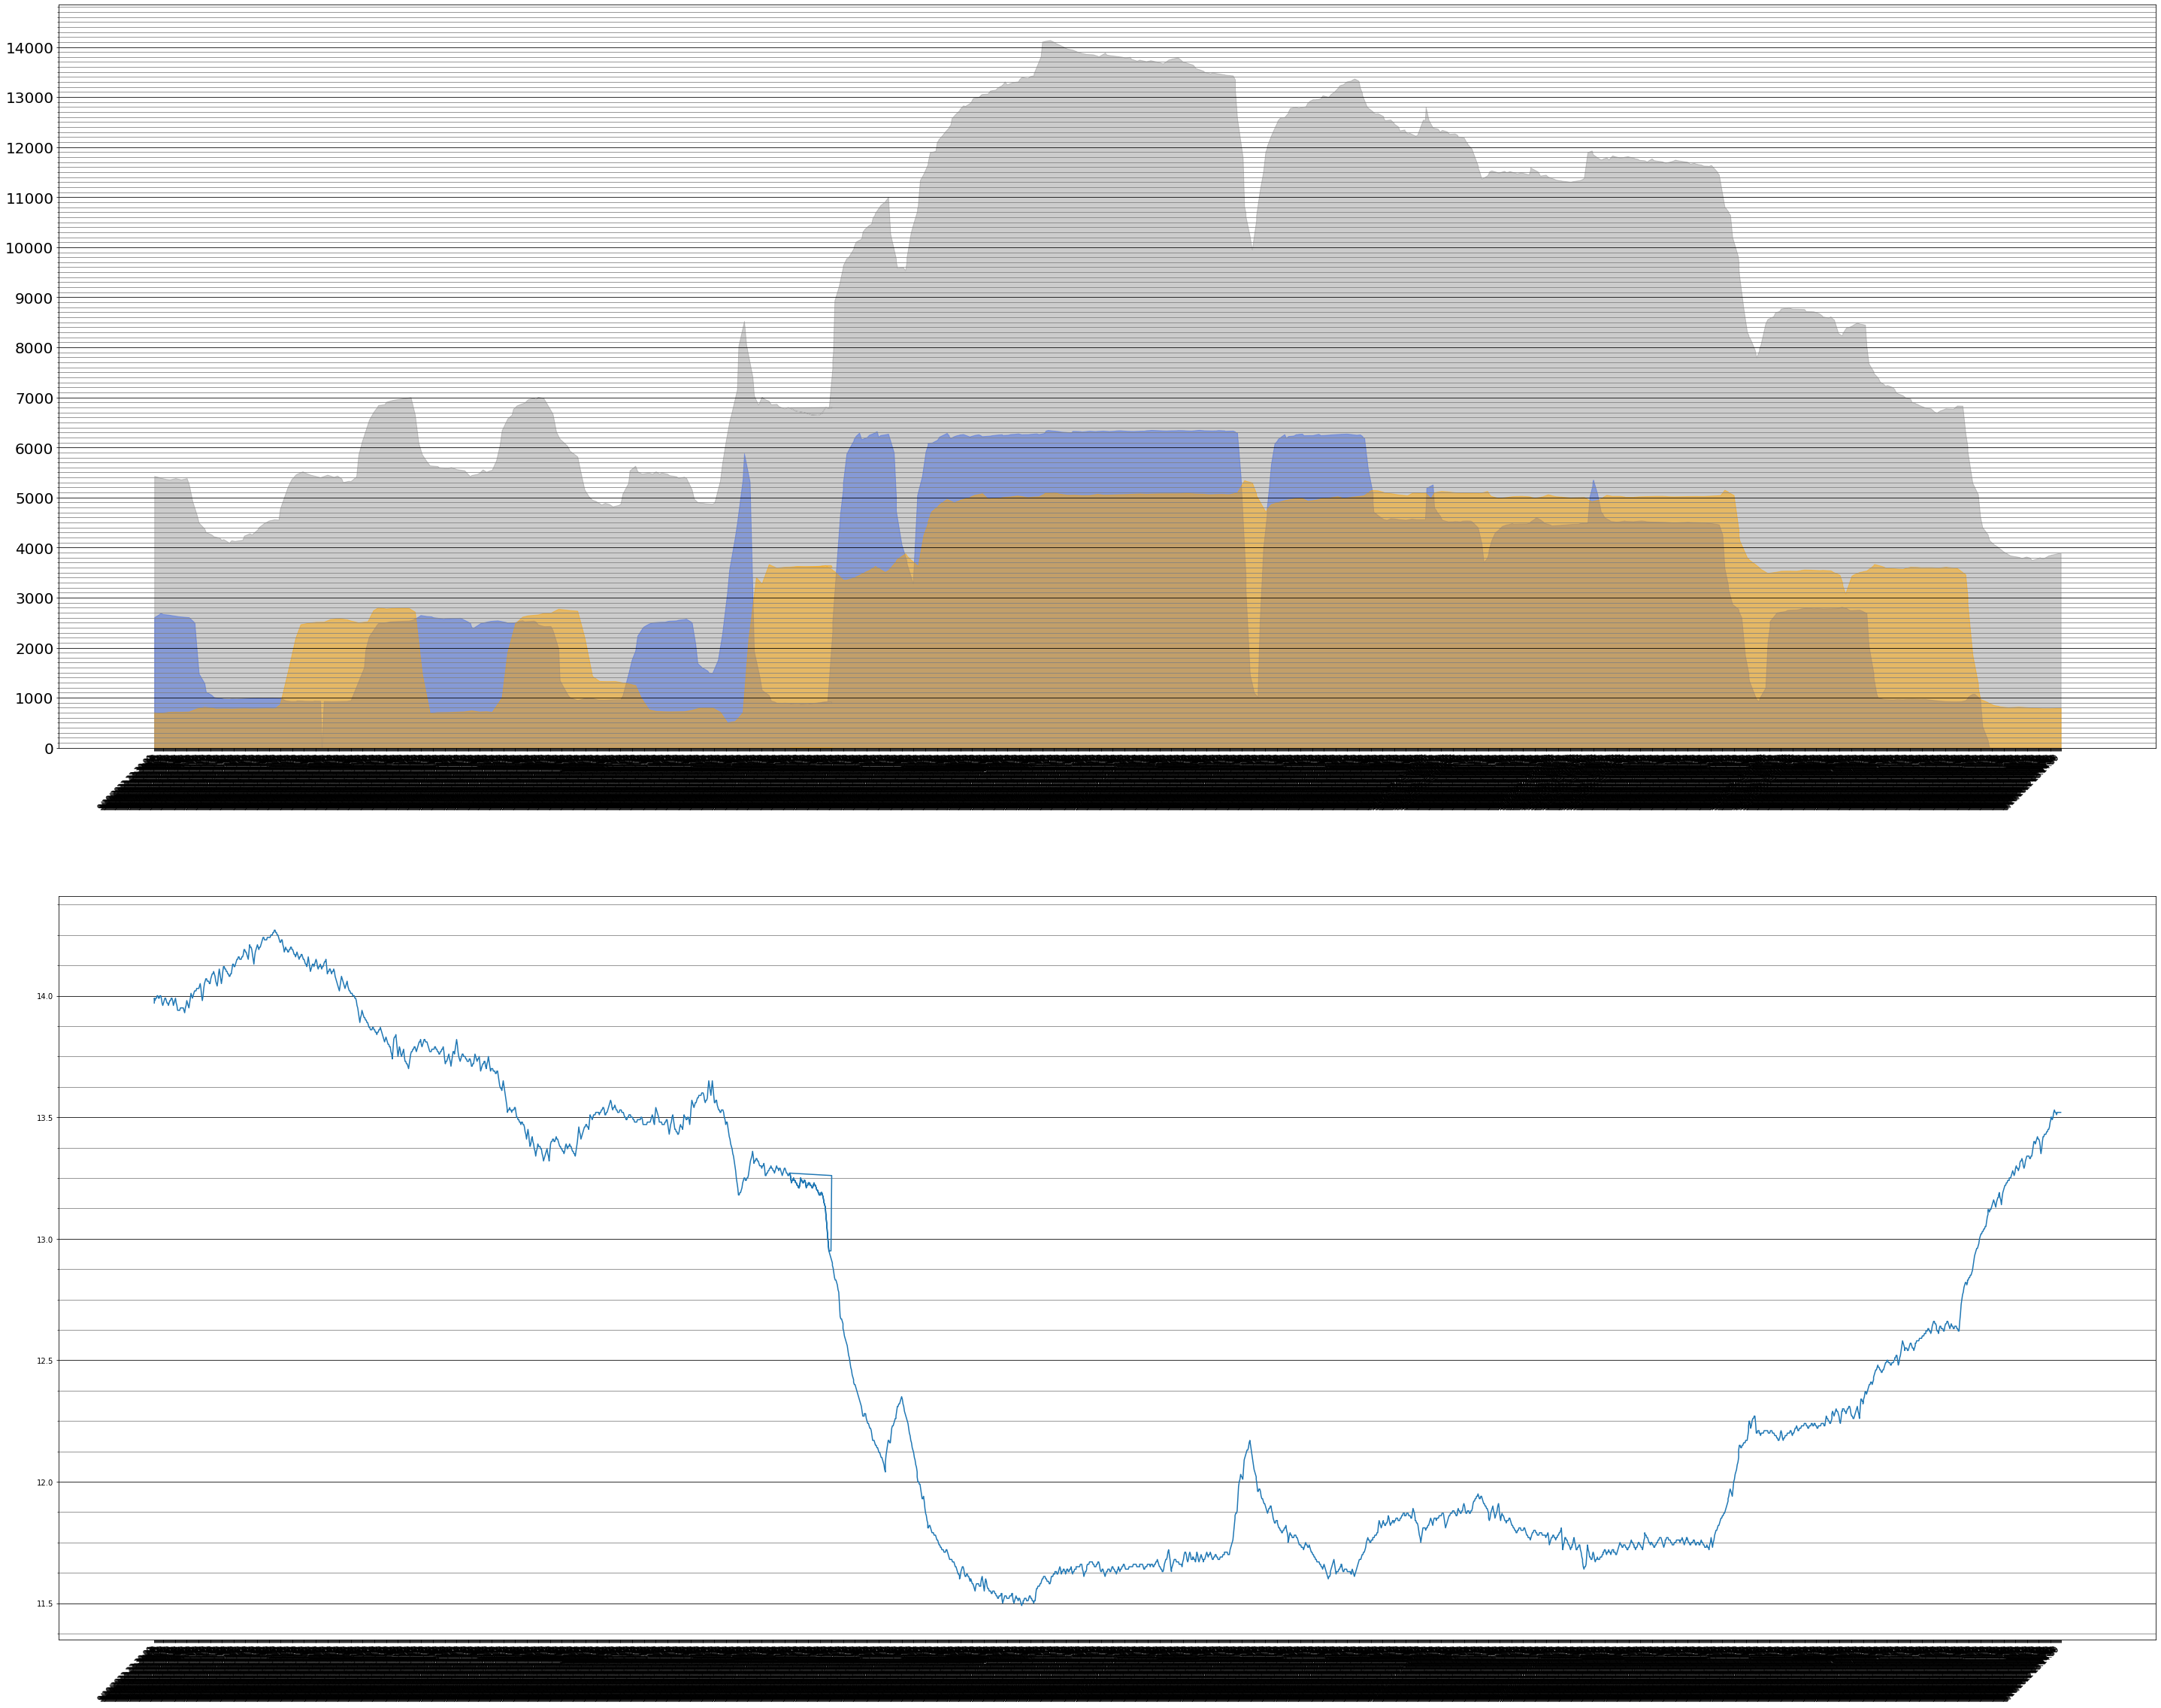

In [52]:

#dfaux=dfx.loc[(dfx.loc[:,'FQI169']+dfx.loc[:,'FQI165'] ) >= 10000]

aux=dfx.loc[dfx.loc[:,'FQI169'] >=4500]
aux1=dfx.loc[dfx.loc[:,'FQI165'] >=5000]

figB, (ax,ax1)= plt.subplots(2,1, figsize=(50,40))

ax.stackplot(dfx['Time'],dfx['FQI161'],alpha=0.4,color='grey')
ax.stackplot(dfx['Time'],dfx['FQI165'],alpha=0.5,color='royalblue')
ax.stackplot(dfx['Time'],dfx['FQI169'],alpha=0.5,color='orange')
ax1.plot(dfx['Time'],dfx['PIR161'])
labels = ax1.get_xticklabels()
labels2 = ax.get_xticklabels()
labels1= ax.get_yticklabels(which='both')
plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')
plt.setp(labels1,fontsize=20, horizontalalignment='right')
plt.setp(labels2, rotation=45,fontsize=10, horizontalalignment='right')

ax.yaxis.set_major_locator(MultipleLocator(1000),)
ax.yaxis.set_minor_locator(MultipleLocator(100),)
#ax1.yaxis.set_major_locator(MultipleLocator(1),)
ax1.yaxis.set_minor_locator(MultipleLocator(0.125),)
ax.axes.grid(True, which='minor',color='grey',axis='y')
ax.axes.grid(True, which='major',color='black',axis='y')
ax1.axes.grid(True, which='minor',color='grey',axis='y')
ax1.axes.grid(True, which='major',color='black',axis='y')
figB.show()



count    1222.000000
mean     5033.351236
std        79.217350
min      4523.580000
25%      5006.932500
50%      5031.960000
75%      5076.537500
max      5343.000000
Name: FQI169, dtype: float64
9/10/2022 22:48:15
9/10/2022 23:07:21


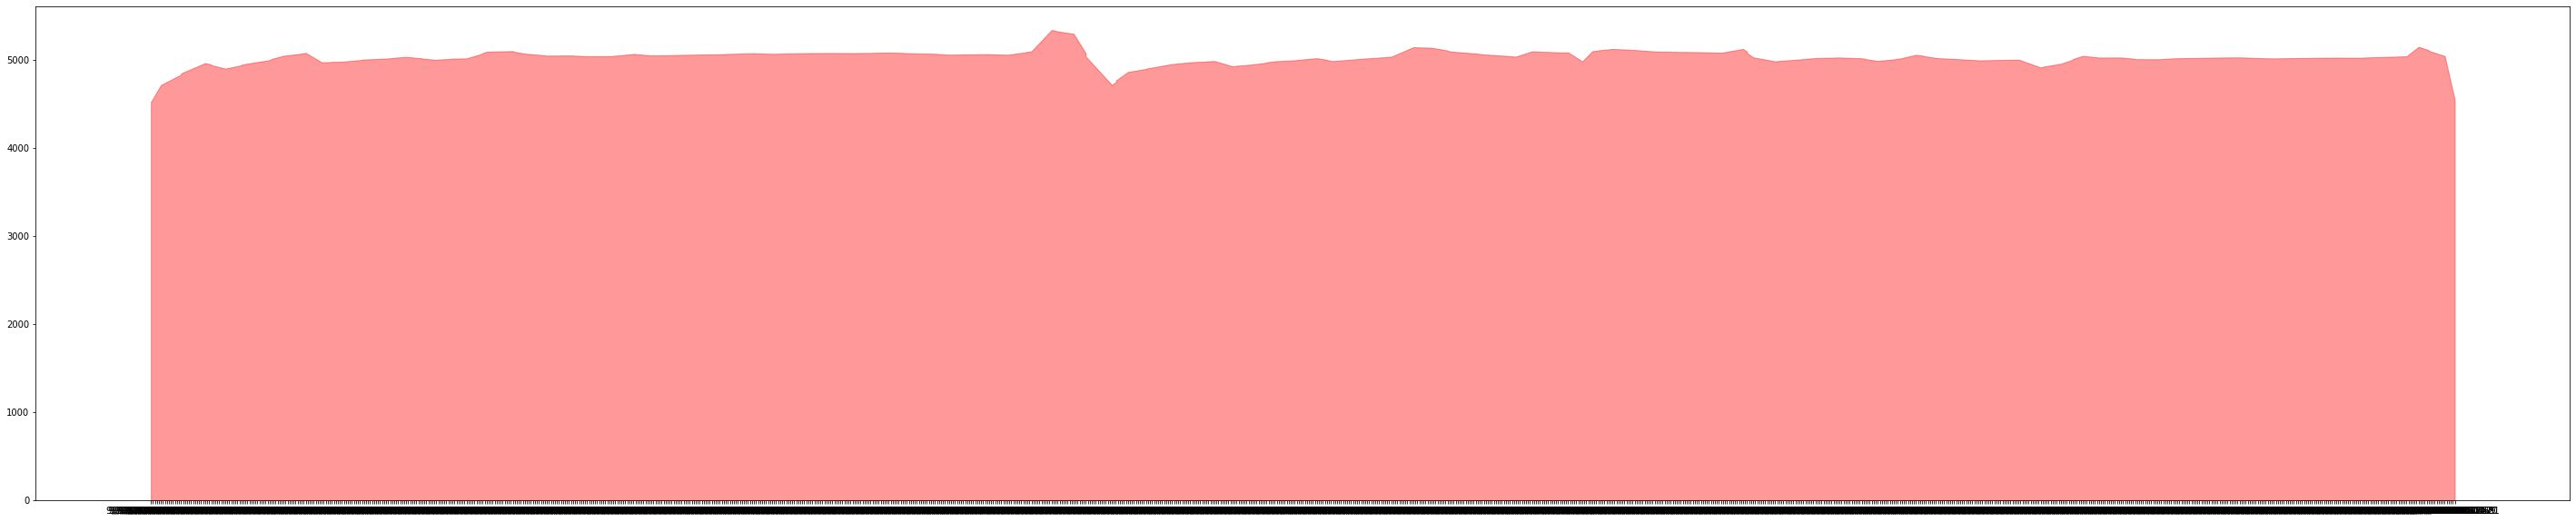

In [44]:
aux
figc, (ax2)= plt.subplots(1, figsize=(50,10))

ax2.stackplot(aux['Time'],aux['FQI169'],alpha=0.4,color='red')
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels(which='both')
plt.setp(labels, rotation=45,fontsize=50, horizontalalignment='right')
plt.setp(labels1,fontsize=40, horizontalalignment='right')
ax.yaxis.set_major_locator(MultipleLocator(1000),)
ax.yaxis.set_minor_locator(MultipleLocator(100),)
figc.show()
print(aux.FQI169.describe())

print(aux['Time'].values[0])
print(aux['Time'].values[len(aux.index)-1])


count     768.000000
mean     6174.812969
std       299.518135
min      5017.000000
25%      6228.832500
50%      6265.715000
75%      6329.770000
max      6350.000000
Name: FQI165, dtype: float64
9/10/2022 22:43:50
9/10/2022 23:04:03


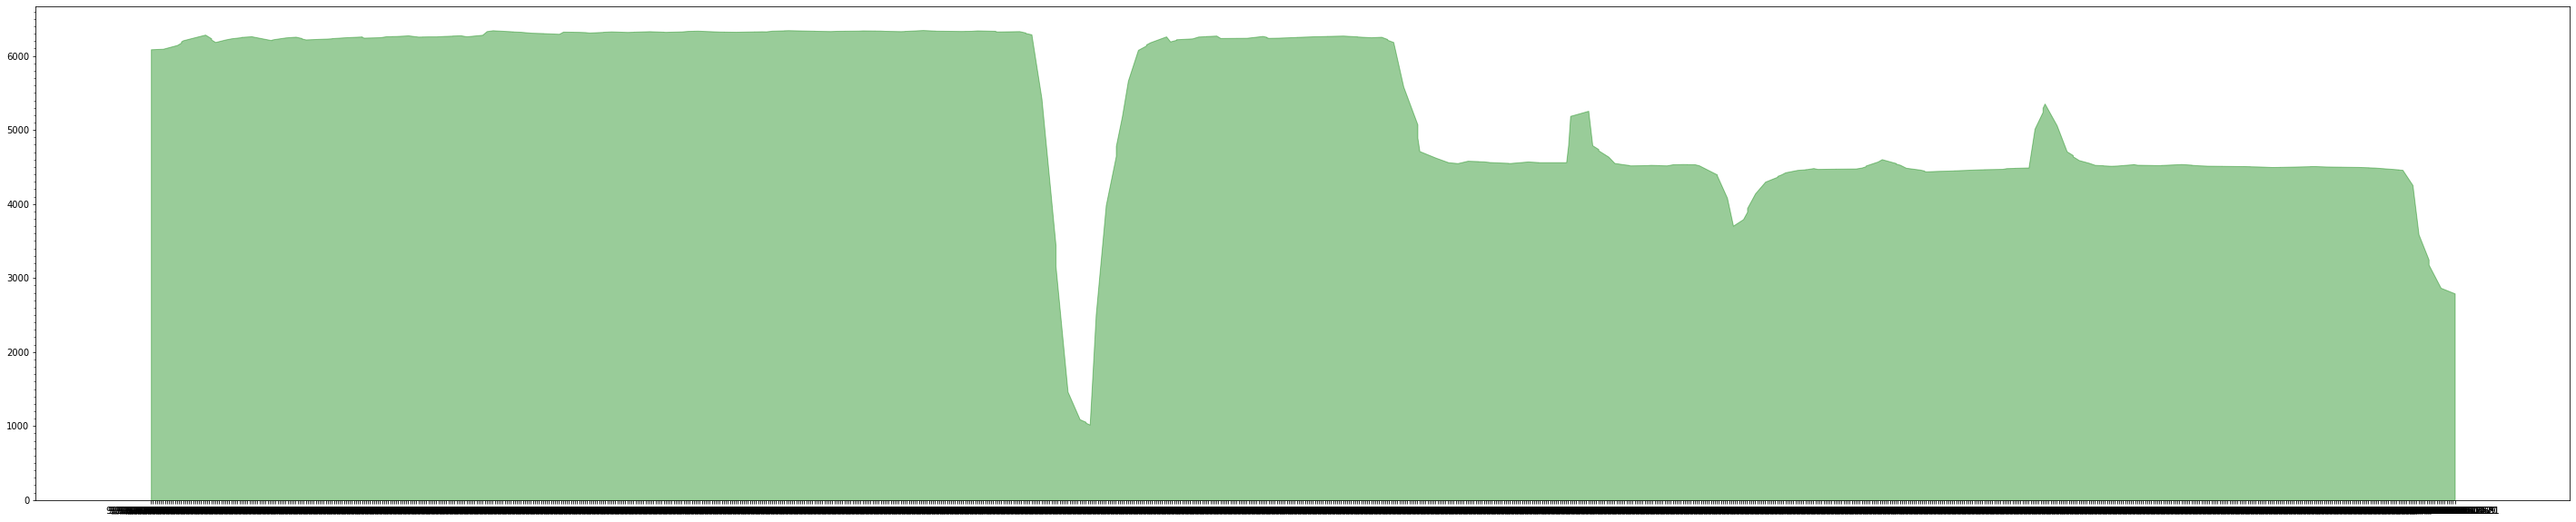

In [53]:

figd, (ax5)= plt.subplots(1, figsize=(50,10))

ax5.stackplot(aux['Time'],aux['FQI165'],alpha=0.4,color='green')
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels(which='both')
plt.setp(labels, rotation=45,fontsize=50, horizontalalignment='right')
plt.setp(labels1,fontsize=40, horizontalalignment='right')
ax5.yaxis.set_major_locator(MultipleLocator(1000),)
ax5.yaxis.set_minor_locator(MultipleLocator(100),)
figd.show()
print(aux1.FQI165.describe())

print(aux1['Time'].values[0])
print(aux1['Time'].values[len(aux1.index)-1])
